In [5]:

import models
import utils
import data_processing
from constants import (
    VALUE_COLUMN,
    UNIT_RATE_COLUMN,
    QUANTITY_COLUMN,
    GROSS_WEIGHT_COLUMN,
    SHIP_COUNT_COLUMN,
    PORT_COUNT_COLUMN,
    FILL_METHOD,
    VOLZA_COLUMNS,
    OIL_COLUMNS,
    AIS_COLUMNS,
    ARIMA_RESIDUAL_COLUMN,
    TARGET_COLUMN
)
import pandas as pd
import constants
import sys
from datetime import datetime
from build_data import get_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

import matplotlib.pyplot as plt
import numpy as np

In [6]:
COMMODITY = "cobalt"
WINDOW_SIZE = 20

VOLZA_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}.csv"
PRICE_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}_prices.csv"

# Get the data
df = get_data(VOLZA_FILE_PATH, PRICE_FILE_PATH, window_size=WINDOW_SIZE, center=False)

# TRAIN_SIZE = 0.5

Building data...


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

Rows dropped due to NaN values: 1
Detecting spikes... 20


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


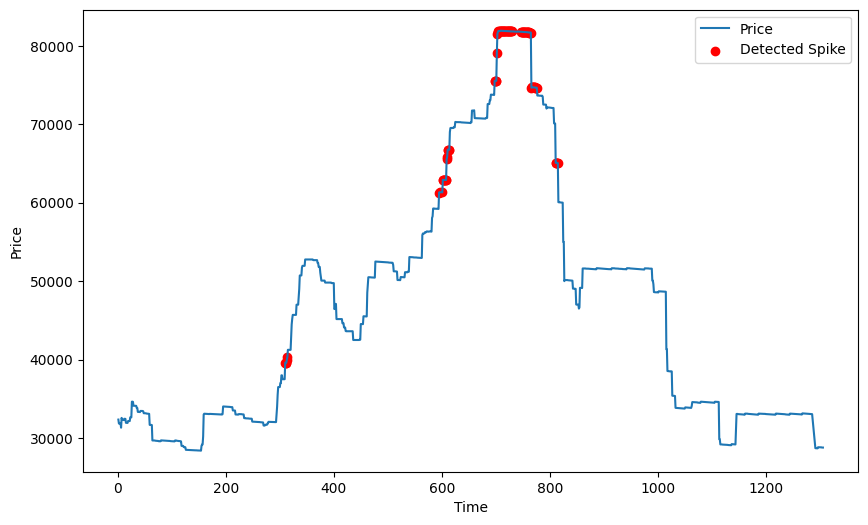

In [7]:
from sklearn.ensemble import IsolationForest
import numpy as np

FEATURE_COLUMNS = TARGET_COLUMN + VOLZA_COLUMNS
df = df.dropna(subset=FEATURE_COLUMNS)
X = df[FEATURE_COLUMNS].values

# Initialize and fit the IF model
clf = IsolationForest(n_estimators=100, contamination=0.07)  # contamination is an estimate of the anomaly proportion
clf.fit(X)

# Predict anomalies (-1 for anomalies, 1 for normal)
is_anomaly = clf.predict(X)
df['Spike_IF'] = is_anomaly == -1


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Price')
plt.scatter(df.index[df['Spike_IF']], df['Price'][df['Spike_IF']], color='red', label='Detected Spike')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [8]:
# Calculate the percentage of spikes
total_spikes = len(df.index[df['Spike_IF']])
total_data_points = len(df)
spike_percentage = (total_spikes / total_data_points) * 100

# Print or display the spike percentage
print(f"Spike Percentage: {spike_percentage:.2f}%")

Spike Percentage: 6.81%
